<div class="alert alert-block alert-warning">
<b>Warning:</b> THIS IS THE MASTER DOCUMENT! DO NOT MAKE UNAGREED CHANGES!!</a>
</div>

***
***
# Table of Contents


[Imports](#imports)

[1. Project Overview](#1-project-overview)

[2. Project Introduction](#2-project-introduction)

[3. Data Description](#3-data-description)

[4. Data Preprocessing](#4-data-preprocessing)

[5. Analysis and Model Training](#5-analysis-and-model-training)

[6. Results](#6-results)

[7. Conclusion and Outlook](#7-conclusion-and-outlook)

[Appendix](#appendix)

***
***
# Imports

In [1]:
import dotenv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import ast
import osmnx as ox

***
# 1. Project Overview

## **Sprottenflotte**

**Authors:**
- Claas Resow - claas.resow@student.fh-kiel.de
- Felix Haack - felix.haack@student.fh-kiel.de
- Justus Heilingbrunner - justus.heilingbrunner@student.fh-kiel.de
- Paul Brodmann - paul.brodmann@student.fh-kiel.de

**Summary:**

A brief description of the project, its objectives and results.

***
# 2. Project Introduction

**Problem statement:**

A detailed description of the problem that your project addresses.

**Objectives and hypotheses:**

Clearly stated objectives and possibly the hypotheses you want to test.

***
# 3. Data Description

- Data sources: Where does the data come from? (e.g. public databases, proprietary data)
    - API


- Data structure: Describe the format of the data (e.g. CSV, JSON) and the key variables.
    - in .csv format
    - Key Variables:
 

**Hub List all time + pick up and drop offs.csv | Features:**

1. **id**: 
2. **name**: 
3. **state**: 
4. **created_at**: 
5. **maximum_capacity**: 
6. **pickups**: 
7. **dropoffs**: 

In [3]:
df_stations = pd.read_csv('Data/Hub List all time + pick up and drop offs.csv')
print(df_stations.shape)
df_stations.head()

(233, 7)


,id,name,state,created_at,maximum_capacity,pickups,dropoffs
0,30467,Stadtwerke Pop-Up,public,2024-09-12 12:45:29.843902,0,4,1
1,30466,Mobilitätsfest Pop-up,public,2024-09-12 12:07:04.481416,0,15,16
2,30464,Pop Up Rathaus event,public,2024-09-12 07:25:05.597799,20,7,3
3,30434,Felde Gemeindezentrum,public,2024-09-08 09:01:16.289455,18,7,9
4,30420,IPN Pop Up,disabled,2024-09-05 20:53:56.364054,10,0,0


In [8]:
print(df_stations['name'].nunique())
df_stations['name'].unique()

233


array(['Stadtwerke Pop-Up', 'Mobilitätsfest Pop-up',
       'Pop Up Rathaus event', 'Felde Gemeindezentrum', 'IPN Pop Up ',
       'SH Netz Cup Pop Up', 'Wankendorf Zob', 'Sporthalle Saxtorfer Weg',
       'Osterby Veranstaltung Pop Up ', 'Hohes Arsenal', 'Jungmannufer',
       'Eiche Dänischenhagen', 'Bushaltestelle Eiderbrücke',
       'Herzog-Friedrich-Straße (ZOB)', 'Rondeel', 'VHS Kurs ',
       'TÖZ Eckernförde ', 'Martinshaus', 'Pop-up Barsbek Korntage',
       'Pop Up VeloCenter ', 'REWE Klausdorf', 'Ostseepark',
       'Stadtwerke / Bürgerhaus Klausdorf', 'Bahnhof Raisdorf',
       'Freibad Raisdorf (saisonal bis 22.09.24)',
       'Rathaus Schwentinental', 'Pop-up Seewiese Bünsdorf',
       'Eiderbad Saison-Station', 'Kiwo Sparkassen Service',
       'B502 Schönkirchener Straße ', 'Langer Rehm P+R',
       'Langer Rehm (Rewe)', 'Wörthstraße', 'KiWo Willestraße ',
       'ab 12 Uhr - KiWo Nordeingang', 'ab 12 Uhr - KiWo Südeingang',
       'KiWo Nordmarksportfeld', 'KiWo Prinz

In [5]:
print('number of missing values:', df_stations.isnull().sum().sum())
print('number of NaN values:', df_stations.isna().sum().sum())
df_stations.info()

number of missing values: 0
number of NaN values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                233 non-null    int64 
 1   name              233 non-null    object
 2   state             233 non-null    object
 3   created_at        233 non-null    object
 4   maximum_capacity  233 non-null    int64 
 5   pickups           233 non-null    int64 
 6   dropoffs          233 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 12.9+ KB


In [9]:
# look at dataset
print('Shape:', df_stations.shape)
print('Columns:', df_stations.columns)
print('\ndifferent names:', df_stations['name'].nunique())
print('unique states:', df_stations['state'].nunique())
print(df_stations['state'].unique())
print('\nmaximal capacity:', df_stations['maximum_capacity'].max())
print('minimal capacity:', df_stations['maximum_capacity'].min())
print(df_stations['maximum_capacity'].unique())
print('\n')
print(df_stations['maximum_capacity'].value_counts()[:5])

Shape: (233, 7)
Columns: Index(['id', 'name', 'state', 'created_at', 'maximum_capacity', 'pickups',
       'dropoffs'],
      dtype='object')

different names: 233
unique states: 3
['public' 'disabled' 'fellows']

maximal capacity: 150
minimal capacity: 0
[  0  20  18  10   7  15  16  12  50   6  30  25 150  19  14  40  21  80
  35]


maximum_capacity
15    78
20    58
30    28
0     23
25    20
Name: count, dtype: int64


***

**FelixData_final_main_kiel.csv | Features:**

1. **index** - ids
2. **entityId** - ids
3. **entitiyType** - ids
4. **name** - ids
5. **availableBikeNumber** - ids
6. **freeSlotNumber** - ids    
7. **totatlSlotNumber** - ids    
8. **pickups** - ids    
9. **dropoffs** - ids   

In [10]:
df = pd.read_csv('FelixData_final_main_kiel.csv')
print(df.shape)
df.head()

(86501, 9)


,index,entityId,entityType,name,availableBikeNumber,freeSlotNumber,totalSlotNumber,pickups,dropoffs
0,2024-06-17T11:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.032787,25.000000,30.0,4627,4683
1,2024-06-17T12:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,6.762712,24.237288,30.0,4627,4683
2,2024-06-17T13:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,6.864407,24.000000,30.0,4627,4683
3,2024-06-17T14:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.846154,24.153846,30.0,4627,4683
4,2024-06-17T15:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.305556,24.694444,30.0,4627,4683


In [11]:
df.columns

Index(['index', 'entityId', 'entityType', 'name', 'availableBikeNumber',
       'freeSlotNumber', 'totalSlotNumber', 'pickups', 'dropoffs'],
      dtype='object')

In [12]:
print('number of missing values:', df.isnull().sum().sum())
print('number of NaN values:', df.isna().sum().sum())
df.info()

number of missing values: 479
number of NaN values: 479
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86501 entries, 0 to 86500
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                86501 non-null  object 
 1   entityId             86501 non-null  int64  
 2   entityType           86501 non-null  object 
 3   name                 86501 non-null  object 
 4   availableBikeNumber  86501 non-null  float64
 5   freeSlotNumber       86501 non-null  float64
 6   totalSlotNumber      86022 non-null  float64
 7   pickups              86501 non-null  int64  
 8   dropoffs             86501 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 5.9+ MB


In [13]:
# look at dataset
print('Shape:', df.shape)
print('Columns:', df.columns)

Shape: (86501, 9)
Columns: Index(['index', 'entityId', 'entityType', 'name', 'availableBikeNumber',
       'freeSlotNumber', 'totalSlotNumber', 'pickups', 'dropoffs'],
      dtype='object')



- Data exploration: Brief preliminary analysis of the data, including statistics on key variables and possibly initial visualizations.
    - visualisations
        - geo map with bikestations
        

In [14]:
df.describe()

,entityId,availableBikeNumber,freeSlotNumber,totalSlotNumber,pickups,dropoffs
count,86501.000000,86501.000000,86501.000000,86022.000000,86501.000000,86501.000000
mean,24526.825227,4.976350,20.367157,26.131431,10763.219974,10722.754847
std,500.767548,6.808609,10.806578,10.999875,10015.680102,9952.040947
min,24367.000000,0.000000,0.000000,15.000000,694.000000,570.000000
25%,24380.000000,0.423729,14.550000,20.000000,4627.000000,4683.000000
50%,24397.000000,2.000000,19.000000,25.000000,7544.000000,7593.000000
75%,24457.000000,6.615385,26.000000,30.000000,14981.000000,15008.000000
max,26889.000000,63.433333,80.000000,80.000000,57838.000000,57410.000000


In [15]:
geo_data = pd.read_csv('data/response_IDs_KielRegion.csv')
geo_data.head()

,ID,Status,Name,Longitude,Latitude
0,30467,0,NaN,NaN,NaN
1,30466,0,NaN,NaN,NaN
2,30464,1,Pop Up Rathaus event,10.132222,54.322469
3,30434,1,Felde Gemeindezentrum,9.933817,54.299552
4,30420,0,NaN,NaN,NaN


In [17]:
geo_data.iloc[3]

ID                           30434
Status                           1
Name         Felde Gemeindezentrum
Longitude                 9.933817
Latitude                 54.299552
Name: 3, dtype: object

In [18]:
# Geo Data kiel from Open Street Map

tags = {'admin_level': '10'}
geo = ox.features_from_place(
    query="Kiel, Germany",
    tags=tags)
geo = geo.reset_index()
geo = geo[geo.element_type=='relation']
geo.head(3)

,element_type,osmid,source,geometry,name,note,fixme,nodes,wikidata,admin_level,boundary,description,ways,type,name:lt
57,relation,968220,description wikipedia http://de.wikipedia.org/...,"POLYGON ((10.10165 54.34537, 10.10205 54.34551...",Ravensberg,NaN,NaN,"[[[6579922566, 4210616712, 4210616718, 4210616...",Q1301655,10,administrative,NaN,"[95922356, 8033159, 700080203, 37332588, 11226...",boundary,NaN
58,relation,969228,NaN,"POLYGON ((10.13046 54.33575, 10.13097 54.33614...",Blücherplatz,NaN,NaN,"[[[1584227487, 195530776, 6906815974, 83197278...",Q1740941,10,administrative,NaN,"[144949011, 155075900, 997472904, 12519965, 10...",boundary,NaN
59,relation,969563,NaN,"POLYGON ((10.09509 54.32890, 10.09596 54.32939...",Schreventeich,NaN,NaN,"[[[323631212, 323642031, 324059936, 323398901,...",Q978752,10,administrative,NaN,"[373722897, 373722896, 62247422, 911887650, 53...",boundary,NaN


In [19]:
geo = geo[['name','geometry']]
geo.head(3)

,name,geometry
57,Ravensberg,"POLYGON ((10.10165 54.34537, 10.10205 54.34551..."
58,Blücherplatz,"POLYGON ((10.13046 54.33575, 10.13097 54.33614..."
59,Schreventeich,"POLYGON ((10.09509 54.32890, 10.09596 54.32939..."


c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project_2024\.venv\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


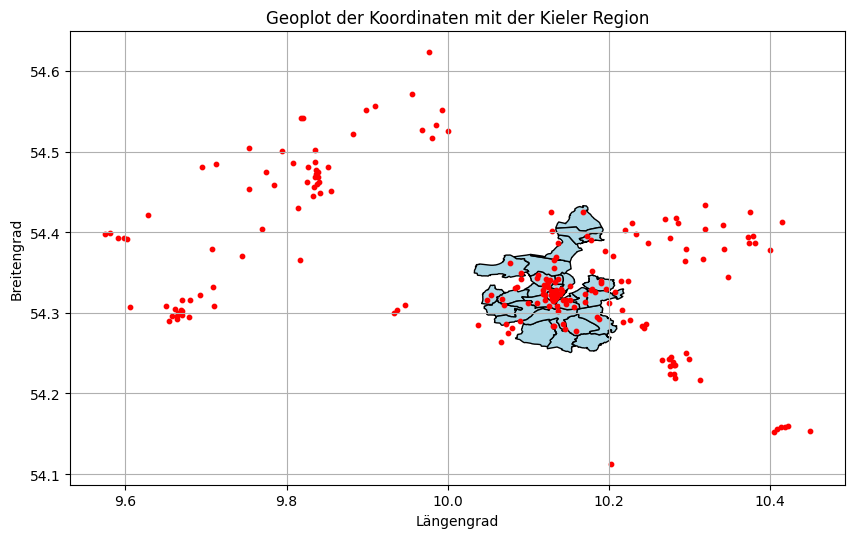

In [20]:
geometry = [Point(xy) for xy in zip(geo_data['Longitude'], geo_data['Latitude'])]

# Erstelle ein GeoDataFrame mit der Spalte 'geometry'
gdf_points = gpd.GeoDataFrame(geo_data, geometry=geometry)

gdf_region = geo # geo

#########
# Plotte die Karte
fig, ax = plt.subplots(figsize=(10, 10))

# Zeichne die Region
gdf_region.plot(ax=ax, color='lightblue', edgecolor='black')

# Zeichne die Punkte
gdf_points.plot(ax=ax, marker='o', color='red', markersize=10)

plt.title('Geoplot der Koordinaten mit der Kieler Region')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.grid(True)

# Zeige die Karte
plt.show()

In [21]:
geometry

[<POINT EMPTY>,
 <POINT EMPTY>,
 <POINT (10.132 54.322)>,
 <POINT (9.934 54.3)>,
 <POINT EMPTY>,
 <POINT (9.679 54.294)>,
 <POINT (10.203 54.112)>,
 <POINT (9.836 54.487)>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT (10.128 54.425)>,
 <POINT (10.09 54.29)>,
 <POINT (10.133 54.317)>,
 <POINT (10.125 54.309)>,
 <POINT EMPTY>,
 <POINT (9.833 54.446)>,
 <POINT (9.654 54.29)>,
 <POINT (10.32 54.403)>,
 <POINT EMPTY>,
 <POINT (10.2 54.312)>,
 <POINT (10.218 54.289)>,
 <POINT (10.216 54.303)>,
 <POINT (10.243 54.281)>,
 <POINT (10.246 54.286)>,
 <POINT (10.241 54.284)>,
 <POINT (9.744 54.37)>,
 <POINT (10.072 54.286)>,
 <POINT EMPTY>,
 <POINT (10.196 54.33)>,
 <POINT (10.19 54.339)>,
 <POINT (10.19 54.337)>,
 <POINT (10.119 54.324)>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT EMPTY>,
 <POINT (10.226 54.291)>,
 <POINT (9.692 54.322)>,
 <POINT (9.681 54.316)>

***
# 4. Data Preprocessing

- Data cleaning
- Transformations
- Feature engineering

***
# 5. Analysis and Model Training

- Exploratory data analysis (EDA): More detailed analyses and visualizations to gain insights.

- Model selection and justification: Which models were tried and why? (e.g. linear regression, decision trees, neural networks)

- Training process: details on how the models were trained, including hyperparameter settings, cross-validation, etc.

- Evaluation and comparison: Metrics for model evaluation and a comparison of the different models.

***
# 6. Results

- Final results: Presentation of the best models and their performance.

- Visualizations: Diagrams and plots that clearly illustrate the results.

- Interpretation of the results: Analysis and interpretation of key findings.

***
# 7. Conclusion and Outlook

- Summary of the results: Brief summary of the most important results and findings.

- Limitations of the project: Mention of possible limitations and challenges.

- Future work: Suggestions for future improvements or further research.

[to Table of Contents](#table-of-contents)

***
# Appendix

- Code snippets: Important but too long code snippets that would unnecessarily bloat the main document.

- Additional data: Further exploratory analysis or test runs.

- Sources and references: Cite any paper, book, or online resources used.